In [9]:
# Build surface mass density shells from lightcone

from astropy import cosmology
from astropy.cosmology import Planck15 as cosmo, z_at_value
from astropy.constants import *
import scipy.integrate as integrate
from scipy.interpolate import UnivariateSpline as spl
from scipy.constants import *
from astropy import coordinates as coord
import astropy.constants as const
import astropy.units as unit
import numpy as np
import numpy.random as rnd
import h5py
import math
import healpy as hp
from datetime import datetime
import os.path
from fast_histogram import histogram1d, histogram2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [10]:
# read particle data from lightcone 
def read_octant(snap, oct):
    fpath = '/cosma6/data/dp004/dc-boot5/Lightcone/Galaxy_FullSky/'
    fname = 'galaxy_lightcone.snap{0:02d}'.format(snap)
    key = 'octant_{0:0d}'.format(oct)
    print('Started, snapshot =', snap, datetime.now(), flush = True)
    with h5py.File(fpath+fname,'r') as fi:
        gals = fi[key]
        print('Opened dataset, octant =', oct, datetime.now(), flush = True)
        r = gals['r']/h
        ra = gals['RA'] 
        dec = gals['Dec'] 
        print('Read variables, number of particles = ',len(r), datetime.now(), flush = True)
             
    lp = r//delta # calculate lens plane number from radial comoving distance
    lp = lp.astype(np.int, copy = False)
    lps = np.unique(lp)    
    global first_lp
    first_lp  = lps.min()
    last_lp = lps.max()
    nlp = len(lps)     
    print('Calculated lensplanes:', lps, ' r_min = {0:0.1f}, r_max = {1:0.1f}'.format(r.min(), r.max()), datetime.now(), flush = True)

    pix = hp.ang2pix(nside, ra, dec, lonlat = True)
    print('Determined pixel', datetime.now(), flush = True)
    
    #sigma = histogram2d(lp, pix, range = [[first_lp, last_lp+1], [0, npix+1]],  bins=[nlp,npix])
    sigma = np.zeros((nlp,npix))
    for l in lps:
        sigma[l - first_lp] = histogram1d(pix[l==lp], range = [0, npix+1],  bins=npix)
    print('Sigma histogram completed', datetime.now(), flush = True)
   
    return sigma

In [11]:
## set resolution
O_DE = 0.6914
o_b  = 0.022161
o_c = 0.11889
h = np.sqrt((o_b + o_c)/(1-O_DE))
O_m = (o_b + o_c)/(h*h)
delta = 200 # lens plane thickness in Mpc
nside = 1024 # 8192
npix = hp.nside2npix(nside)
dens_fac =  2.69e11 * const.M_sun /h * npix  / (4 * np.pi)
print('Nside =', nside, ' npix =',npix, 'h = ',h,'Omega_m = ', O_m)

Nside = 1024  npix = 12582912 h =  0.6760676010330318 Omega_m =  0.3086


In [12]:
lens_path = '/cosma6/data/dp004/dc-boot5/lensplanes/OnionSkin_test/'
for snap in range(62,63):
    for oct in range(8):
        if oct==0:
            sigma = read_octant(snap,oct)
        else:
            sigma += read_octant(snap,oct)
        
    nlp = sigma.shape[0]
    for l in range(nlp):     
        # write sigma to file
        plane = l + first_lp
        sigma_file = lens_path + 'Lens_plane_{0:0d}_nside_{1:0d}'.format(plane, nside)
        # check whether file already exists
        if os.path.isfile(sigma_file):
            sigma0 = hp.read_map(sigma_file, dtype = np.int)
            # add new sigma to old sigma
            sigma[l] += sigma0
            
        if l>=0:    
            hp.write_map(sigma_file, sigma[l], dtype = np.int, overwrite = True)
            print ('sigma written to lens plane {0:0d}'.format(plane), flush = True)
        

Started, snapshot = 62 2020-06-09 14:14:29.647833
Opened dataset, octant = 0 2020-06-09 14:14:30.148446
Read variables, number of particles =  408962 2020-06-09 14:14:30.651674
Calculated lensplanes: [0 1]  r_min = 50.3, r_max = 202.5 2020-06-09 14:14:30.705035
Determined pixel 2020-06-09 14:14:30.744331
Sigma histogram completed 2020-06-09 14:14:30.900793
Started, snapshot = 62 2020-06-09 14:14:30.901993
Opened dataset, octant = 1 2020-06-09 14:14:30.903925
Read variables, number of particles =  319885 2020-06-09 14:14:31.112654
Calculated lensplanes: [0 1]  r_min = 50.3, r_max = 202.5 2020-06-09 14:14:31.126470
Determined pixel 2020-06-09 14:14:31.147221
Sigma histogram completed 2020-06-09 14:14:31.297777
Started, snapshot = 62 2020-06-09 14:14:31.344342
Opened dataset, octant = 2 2020-06-09 14:14:31.346559
Read variables, number of particles =  422798 2020-06-09 14:14:31.669604
Calculated lensplanes: [0 1]  r_min = 50.3, r_max = 202.5 2020-06-09 14:14:31.697132
Determined pixel 202

FileNotFoundError: [Errno 2] No such file or directory: '/cosma6/data/dp004/dc-boot5/lensplanes/OnionSkin_test/Lens_plane_0_nside_1024'

In [22]:
fname = '/cosma6/data/dp004/dc-boot5/lensplanes/OnionSkin_100Mpc/Lens_plane_10_nside_8192'

In [23]:
m = hp.read_map(fname)

NSIDE = 8192
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


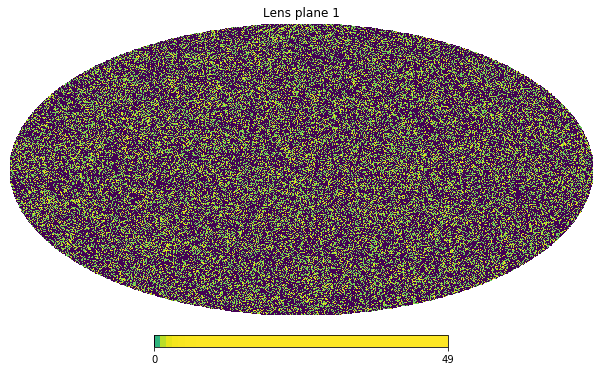

In [24]:
hp.mollview(m, norm='hist', title = 'Lens plane 1')
#plt.savefig('lens_plane.pdf', format = 'pdf')

In [27]:
m2 = hp.ud_grade(m,256)

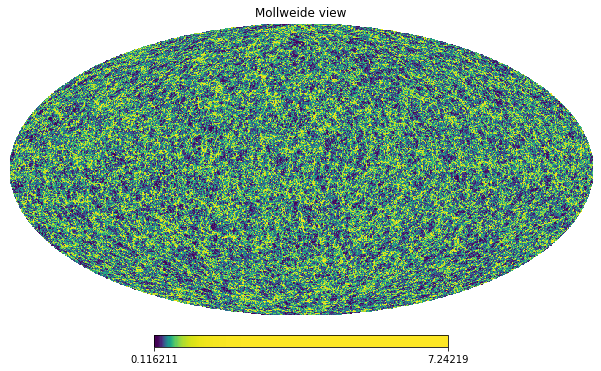

In [28]:
hp.mollview(m2, norm='hist')

In [120]:
for lp in range(22):
    fname = '/cosma6/data/dp004/dc-boot5/lensplanes/OnionSkin/Lens_plane_{0:0d}_nside_8192'.format(lp)
    m = hp.read_map(fname, verbose = False)
    print (lp, m.mean(), m.max(), m.sum())

0 0.007994701464970907 16.0 6438184.0
1 0.027798589318990707 14.0 22386381.0
2 0.07764213035504024 36.0 62525702.0
3 0.1526658535003662 54.0 122942784.0
4 0.2492807644108931 80.0 200747387.0
5 0.37404172991712886 129.0 301218187.0
6 0.5192583414415518 169.0 418162049.0
7 0.6876886921624342 206.0 553800083.0
8 0.8880577186743418 233.0 715158536.0
9 1.100703027099371 215.0 886403157.0
10 1.3566569710771244 323.0 1092524498.0
11 1.6261808934311073 342.0 1309573829.0
12 1.9190342761576176 421.0 1545410523.0
13 2.2341341922680535 355.0 1799162492.0
14 2.5058376689751944 552.0 2017967032.0
15 2.9578234938283763 504.0 2381954095.0
16 3.3420867224534354 479.0 2691403720.0
17 3.7563803692658744 480.0 3025037032.0
18 4.082506152490775 476.0 3287668202.0
19 4.66789586097002 539.0 3759086262.0
20 5.726861163973808 504.0 4611877764.0
21 5.6705977854629355 728.0 4566568507.0


In [113]:
for lp in range(30):
    fname = '/cosma6/data/dp004/dc-boot5/lensplanes/OnionSkin_100Mpc/Lens_plane_{0:0d}_nside_8192'.format(lp)
    m = hp.read_map(fname, verbose = False)
    print (lp, m.mean(), m.max(), m.sum())

0 0.0014173065622647603 5.0 1141366.0
1 0.011322520673274994 10.0 9118098.0
2 0.03122318908572197 28.0 25144233.0
3 0.06093267475565275 36.0 49069471.0
4 0.10153192033370335 41.0 81764302.0
5 0.15073426316181818 71.0 121387262.0
6 0.210540189097325 80.0 169549355.0
7 0.2815748602151871 91.0 226754028.0
8 0.35853135337432224 157.0 288727582.0
9 0.4478281227250894 169.0 360638839.0
10 0.5441012581189474 206.0 438168208.0
11 0.6573258203764757 232.0 529348669.0
12 0.776779712488254 201.0 625545649.0
13 0.9032581547896067 234.0 727399544.0
14 1.047842218230168 322.0 843834011.0
15 1.1946688778698444 342.0 962074455.0
16 1.3527417009075482 427.0 1089371506.0
17 1.5192428876956303 303.0 1223455972.0
18 1.6969019398093224 355.0 1366525938.0
19 1.8846795484423637 397.0 1517744442.0
20 2.0920592000087104 552.0 1684748596.0
21 2.300493768105904 476.0 1852602281.0
22 2.512233446041743 438.0 2023117592.0
23 2.7373883314430714 411.0 2204436255.0
24 2.9835043052832284 477.0 2402635016.0
25 3.2265122